## Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

### First we will do it for cases now i am Reading the confirmed cases data

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/naramsupriya/Downloads/covid_confirmed_usafacts.csv')
#As we need to focus on the analysis of selected dates, starts from 2020, July - 2020, December.
#we need make a copy of covid_confirmed_usafacts so that our original dataframe will be not changed
cases= df.copy(deep=True)
# we are using deep to make a copy of our dataframe
print(cases.head(5))
#now we have a dataframe cases with exact same information

   countyFIPS            County Name State  StateFIPS  1/22/20  1/23/20  \
0           0  Statewide Unallocated    AL          1        0        0   
1        1001        Autauga County     AL          1        0        0   
2        1003        Baldwin County     AL          1        0        0   
3        1005        Barbour County     AL          1        0        0   
4        1007           Bibb County     AL          1        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/14/23  7/15/23  7/16/23  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...    19913    19913    19913   
2        0        0        0        0  ...    70521    70521    70521   
3        0        0        0        0  ...     7582     7582     7582   
4        0        0        0        0  ...     8149     8149     8149   

   7/17/23  7/18/23  7/19/23  7/20/23  7/21/23  7/22/23  7/23/23  
0        0        0        0        0      

### As we need to focus on the analysis of selected dates, starts from 2020 July - 2020 December. we need select columns from that dates 

In [2]:
import pandas as pd

# Assuming 'cases' is our original DataFrame

# Create DataFrames for 'countyFIPS', 'County Name', 'State', and 'StateFIPS' columns
metadata_columns = cases[['countyFIPS', 'County Name', 'State', 'StateFIPS']]

# Define the start and end dates for the date range
start_date = '7/6/20'  # First Monday in July
end_date = '12/27/20'  # Last Sunday in December

# Find the column indices based on the date range
start_idx = cases.columns.get_loc(start_date)
end_idx = cases.columns.get_loc(end_date)

# Select the columns you want to keep within the date range from 
#the syntax we can say that we want all rows but only some columns
ourdates = cases.iloc[:, start_idx:end_idx+1 ]
#as we will lose first 4 columns we will use concat function 
# Concatenate the metadata columns and the required date range columns
july_dec_cases = pd.concat([metadata_columns, ourdates], axis=1)
 
print(july_dec_cases)
 

      countyFIPS            County Name State  StateFIPS  7/6/20  7/7/20  \
0              0  Statewide Unallocated    AL          1       0       0   
1           1001        Autauga County     AL          1     618     644   
2           1003        Baldwin County     AL          1     911     997   
3           1005        Barbour County     AL          1     356     360   
4           1007           Bibb County     AL          1     197     199   
...          ...                    ...   ...        ...     ...     ...   
3188       56037     Sweetwater County     WY         56     113     122   
3189       56039          Teton County     WY         56     145     146   
3190       56041          Uinta County     WY         56     190     190   
3191       56043       Washakie County     WY         56      39      40   
3192       56045         Weston County     WY         56       1       1   

      7/8/20  7/9/20  7/10/20  7/11/20  ...  12/18/20  12/19/20  12/20/20  \
0         

## We are now creating new dataframe  weekly cases for our statistics

In [3]:
weeklyCases = july_dec_cases.loc[:,('countyFIPS','County Name','State','StateFIPS')]
weeklyCases

,countyFIPS,County Name,State,StateFIPS
0,0,Statewide Unallocated,AL,1
1,1001,Autauga County,AL,1
2,1003,Baldwin County,AL,1
3,1005,Barbour County,AL,1
4,1007,Bibb County,AL,1
...,...,...,...,...
3188,56037,Sweetwater County,WY,56
3189,56039,Teton County,WY,56
3190,56041,Uinta County,WY,56
3191,56043,Washakie County,WY,56


### we need to do some changes to weeklyCases for that we are using melt function and the changes are to be done on the dates 

In [4]:
# Using the melt function to covert wide dataframe into long dataframe so that we can perform operations on the data easily.

weeklyCases_changed=pd.melt(july_dec_cases,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'cases')
print(weeklyCases_changed)
weeklyCases_changed.to_csv('weeklyCases_changed.csv' , index=False)

        countyFIPS            County Name State  StateFIPS      Date  cases
0                0  Statewide Unallocated    AL          1    7/6/20      0
1             1001        Autauga County     AL          1    7/6/20    618
2             1003        Baldwin County     AL          1    7/6/20    911
3             1005        Barbour County     AL          1    7/6/20    356
4             1007           Bibb County     AL          1    7/6/20    197
...            ...                    ...   ...        ...       ...    ...
558770       56037     Sweetwater County     WY         56  12/27/20   2854
558771       56039          Teton County     WY         56  12/27/20   2080
558772       56041          Uinta County     WY         56  12/27/20   1497
558773       56043       Washakie County     WY         56  12/27/20    747
558774       56045         Weston County     WY         56  12/27/20    466

[558775 rows x 6 columns]


In [5]:
weeklyCases_changed['Date'] = pd.to_datetime(weeklyCases_changed['Date'])
weeklyCases_changed.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Date           datetime64[ns]
cases                   int64
dtype: object

### Now i am selecting a state that is "vermont" to  generate weekly   Cases  statistics 


In [6]:
import statistics
selected_state  = weeklyCases_changed[weeklyCases_changed["State"]=='VT']
print(selected_state) 
 
select_state_weekly_statistics = selected_state.groupby([pd.Grouper(key='Date', freq ='w')])['cases'].agg(['mean','median', lambda x : x.mode()[0]]).reset_index()
# we are renaming the column names
select_state_weekly_statistics.columns = ['Week', 
                        'Mean', 'Median', 'Mode']
select_state_weekly_statistics

        countyFIPS            County Name State  StateFIPS       Date  cases
2851             0  Statewide Unallocated    VT         50 2020-07-06      5
2852         50001        Addison County     VT         50 2020-07-06     68
2853         50003     Bennington County     VT         50 2020-07-06     73
2854         50005      Caledonia County     VT         50 2020-07-06     21
2855         50007     Chittenden County     VT         50 2020-07-06    630
...            ...                    ...   ...        ...        ...    ...
558443       50019        Orleans County     VT         50 2020-12-27    287
558444       50021        Rutland County     VT         50 2020-12-27    414
558445       50023     Washington County     VT         50 2020-12-27    866
558446       50025        Windham County     VT         50 2020-12-27    426
558447       50027        Windsor County     VT         50 2020-12-27    377

[2625 rows x 6 columns]


,Week,Mean,Median,Mode
0,2020-07-12,84.647619,42.0,10
1,2020-07-19,88.295238,44.0,5
2,2020-07-26,91.885714,45.0,14
3,2020-08-02,94.057143,47.0,14
4,2020-08-09,96.152381,53.0,14
5,2020-08-16,99.238095,57.0,6
6,2020-08-23,102.647619,59.0,6
7,2020-08-30,105.761905,61.0,6
8,2020-09-06,109.171429,63.0,123
9,2020-09-13,110.895238,64.0,123


## death stastics

In [7]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/covid_deaths_usafacts.csv')
#As we need to focus on the analysis of selected dates, starts from 2020, July - 2020, December.
#we need make a copy of covid_confirmed_usafacts so that our original dataframe will be not changed
deaths= df.copy(deep=True)
# we are using deep to make a copy of our dataframe
print(deaths.head(5))
#now we have a dataframe cases with exact same information

   countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2023-07-14  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...         235   
2           0           0           0           0  ...         731   
3           0           0           0           0  ...         104   
4           0           0           0           0  ...         111   

   2023-07-15  2023-07-16  2023-07-17  2023-07-18  2023-07-19  2023-07-20  \
0           0  

In [8]:
import pandas as pd

# Assuming 'cases' is your original DataFrame

# Create DataFrames for 'countyFIPS', 'County Name', 'State', and 'StateFIPS' columns
metadata_columns = deaths[['countyFIPS', 'County Name', 'State', 'StateFIPS']]

# Define the start and end dates for the date range
start_date = '2020-07-06'  # First Monday in July
end_date = '2020-12-27'   # Last Sunday in December

# Find the column indices based on the date range
start_idx = deaths.columns.get_loc(start_date)
end_idx = deaths.columns.get_loc(end_date)

# Select the columns you want to keep within the date range
ourdates = deaths.iloc[:, start_idx:end_idx+1 ]

# Concatenate the metadata columns and the required date range columns
july_dec_deaths = pd.concat([metadata_columns, ourdates], axis=1)
 
print(july_dec_deaths.head(5))
 

   countyFIPS            County Name State  StateFIPS  2020-07-06  2020-07-07  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1          13          13   
2        1003        Baldwin County     AL          1          10          10   
3        1005        Barbour County     AL          1           2           2   
4        1007           Bibb County     AL          1           1           1   

   2020-07-08  2020-07-09  2020-07-10  2020-07-11  ...  2020-12-18  \
0           0           0           0           0  ...           0   
1          13          14          15          15  ...          44   
2          10          11          12          12  ...         146   
3           2           2           2           2  ...          30   
4           1           1           1           1  ...          42   

   2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-23  2020-12-24  \
0           0  

## We are now creating new dataframe  weekly cases for our statistics

In [9]:
weeklydeaths = july_dec_deaths.loc[:,('countyFIPS','County Name','State','StateFIPS')]
weeklydeaths

,countyFIPS,County Name,State,StateFIPS
0,0,Statewide Unallocated,AL,1
1,1001,Autauga County,AL,1
2,1003,Baldwin County,AL,1
3,1005,Barbour County,AL,1
4,1007,Bibb County,AL,1
...,...,...,...,...
3188,56037,Sweetwater County,WY,56
3189,56039,Teton County,WY,56
3190,56041,Uinta County,WY,56
3191,56043,Washakie County,WY,56


### we need to do some changes to weeklydeaths for that we are using melt function and the changes are to be done on the dates 

In [10]:
# Using the melt function to covert wide dataframe into long dataframe so that we can perform operations on the data easily.
 
weeklydeaths_changed=pd.melt(july_dec_deaths,id_vars=('countyFIPS','County Name','State','StateFIPS'),var_name='Date',value_name= 'deaths')
print(weeklydeaths_changed)
weeklydeaths_changed.to_csv('weeklydeaths_changed.csv' , index=False)

        countyFIPS            County Name State  StateFIPS        Date  deaths
0                0  Statewide Unallocated    AL          1  2020-07-06       0
1             1001        Autauga County     AL          1  2020-07-06      13
2             1003        Baldwin County     AL          1  2020-07-06      10
3             1005        Barbour County     AL          1  2020-07-06       2
4             1007           Bibb County     AL          1  2020-07-06       1
...            ...                    ...   ...        ...         ...     ...
558770       56037     Sweetwater County     WY         56  2020-12-27      15
558771       56039          Teton County     WY         56  2020-12-27       2
558772       56041          Uinta County     WY         56  2020-12-27       7
558773       56043       Washakie County     WY         56  2020-12-27      11
558774       56045         Weston County     WY         56  2020-12-27       2

[558775 rows x 6 columns]


### changing date to datatime format

In [11]:
weeklydeaths_changed['Date'] = pd.to_datetime(weeklyCases_changed['Date'])
weeklydeaths_changed.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Date           datetime64[ns]
deaths                  int64
dtype: object

### Now i am selecting a state that is "vermont" to  generate weekly statistics 


In [12]:
import statistics
import pandas as pd
selected_state  = weeklydeaths_changed[weeklydeaths_changed["State"]=='VT']
print(selected_state)
 
select_state_weekly_death_statistics = selected_state.groupby([pd.Grouper(key='Date', freq ='w')])['deaths'].agg(['mean','median', lambda x : x.mode()[0]]).reset_index()
select_state_weekly_death_statistics.columns = ['Week', 
                        'Mean', 'Median', 'Mode']
select_state_weekly_death_statistics
 

        countyFIPS            County Name State  StateFIPS       Date  deaths
2851             0  Statewide Unallocated    VT         50 2020-07-06       0
2852         50001        Addison County     VT         50 2020-07-06       2
2853         50003     Bennington County     VT         50 2020-07-06       1
2854         50005      Caledonia County     VT         50 2020-07-06       0
2855         50007     Chittenden County     VT         50 2020-07-06      39
...            ...                    ...   ...        ...        ...     ...
558443       50019        Orleans County     VT         50 2020-12-27       4
558444       50021        Rutland County     VT         50 2020-12-27       8
558445       50023     Washington County     VT         50 2020-12-27       7
558446       50025        Windham County     VT         50 2020-12-27       5
558447       50027        Windsor County     VT         50 2020-12-27       3

[2625 rows x 6 columns]


,Week,Mean,Median,Mode
0,2020-07-12,3.733333,1.0,0
1,2020-07-19,3.733333,1.0,0
2,2020-07-26,3.733333,1.0,0
3,2020-08-02,3.761905,1.0,0
4,2020-08-09,3.838095,1.0,0
5,2020-08-16,3.866667,1.0,0
6,2020-08-23,3.866667,1.0,0
7,2020-08-30,3.866667,1.0,0
8,2020-09-06,3.866667,1.0,0
9,2020-09-13,3.866667,1.0,0


## Compare the data against other states cases (compare against 5 states).

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/4047200314.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



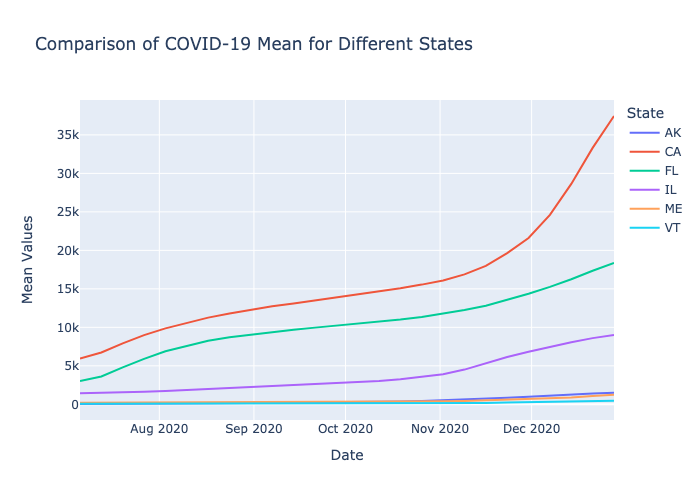

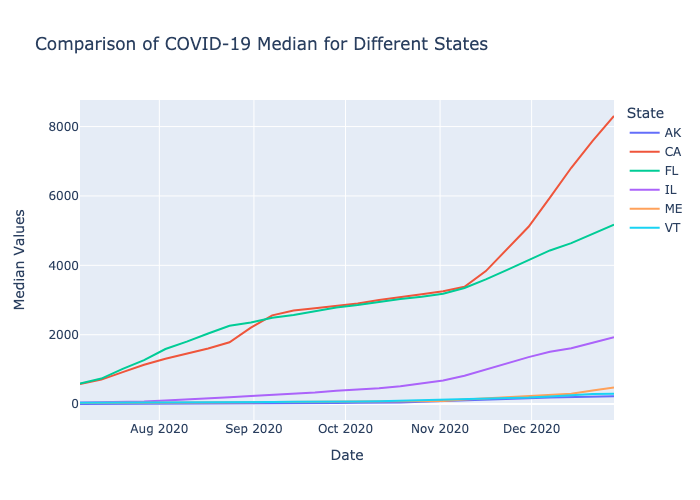

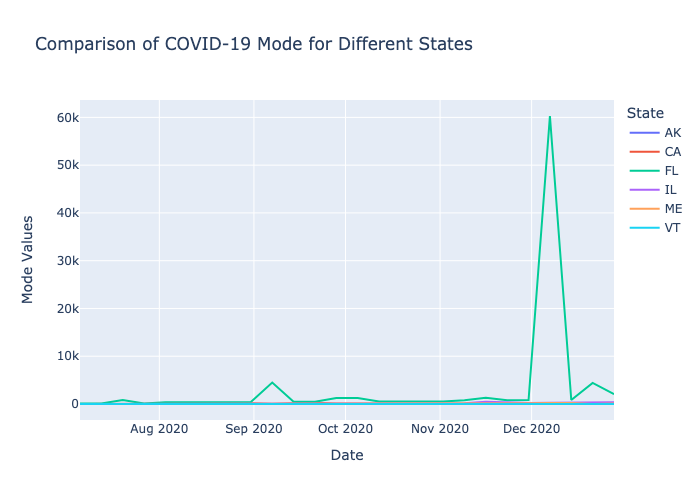

In [47]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import os
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame (assuming you have it)
covid_data = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')

# Specify the specific state and 5 comparison states
specific_state = 'VT'
comparison_states = ['AK', 'CA', 'FL', 'IL', 'ME']

# Filter COVID-19 data for the specific state and comparison states
selected_states_data = covid_data[covid_data['State'].isin([specific_state] + comparison_states)]

# Convert the 'Date' column to datetime
selected_states_data['Date'] = pd.to_datetime(selected_states_data['Date'])

# Sort the DataFrame by 'Date' in ascending order
selected_states_data = selected_states_data.sort_values(by='Date')

# Group data by week and calculate mean, median, and mode for cases
weekly_stats = selected_states_data.groupby(['State', pd.Grouper(key='Date', freq='W-MON')])['cases'].agg(['mean', 'median', lambda x: statistics.mode(x)]).reset_index()
weekly_stats.columns = ['State', 'Date', 'Mean', 'Median', 'Mode']

# Create separate figures for Mean, Median, and Mode
for statistic in ['Mean', 'Median', 'Mode']:
    fig = px.line(weekly_stats, x='Date', y=statistic, color='State',
                  title=f'Comparison of COVID-19 {statistic} for Different States',
                  labels={statistic: f'{statistic} Values'})

    # Modify date labels to move one place forward (shifted)
    fig.update_xaxes(dtick='M1', tickformat='%b %Y')
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(title_text=f'{statistic} Values')

    # Save the static image to a temporary file
    temp_image_filename = f'temp_{statistic.lower()}.png'
    pio.write_image(fig, temp_image_filename)

    # Display the image in the notebook
    display(Image(filename=temp_image_filename))

# Clean up temporary files
for statistic in ['Mean', 'Median', 'Mode']:
    temp_image_filename = f'temp_{statistic.lower()}.png'
    os.remove(temp_image_filename)


## Compare the data against other states deaths (compare against 5 states).

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/560446914.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



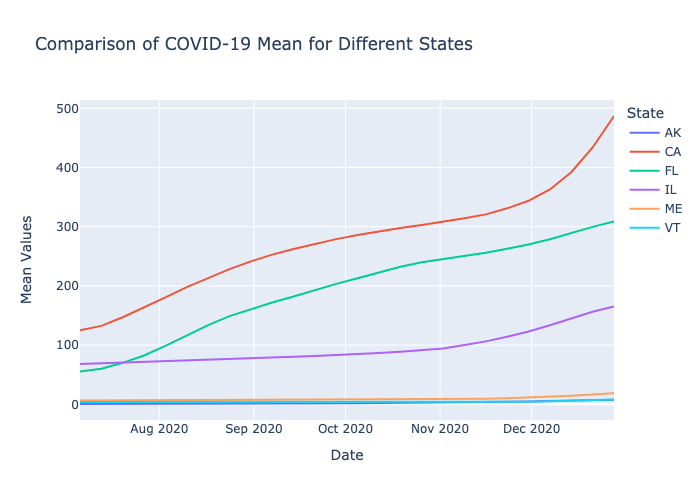

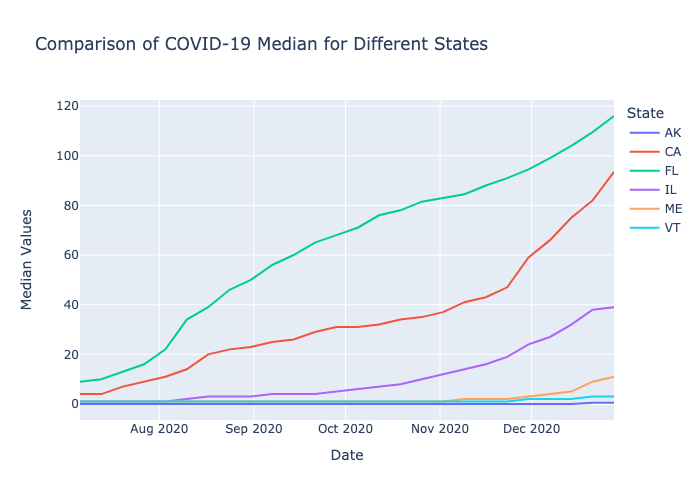

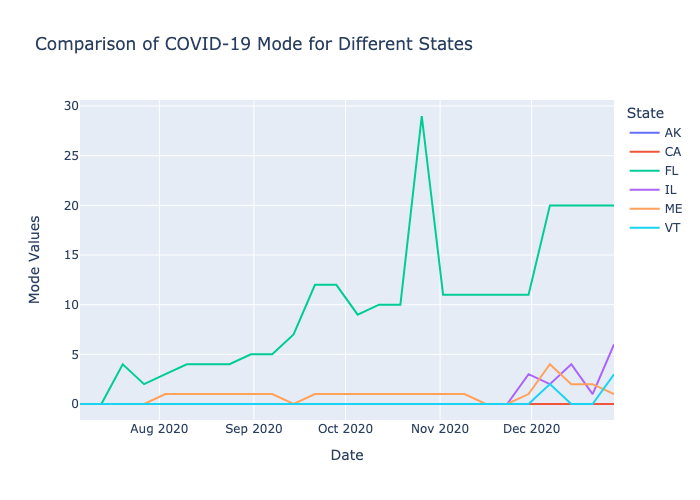

In [48]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import os
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame (assuming you have it)
covid_data = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')

# Specify the specific state and 5 comparison states
specific_state = 'VT'
comparison_states = ['AK', 'CA', 'FL', 'IL', 'ME']

# Filter COVID-19 data for the specific state and comparison states
selected_states_data = covid_data[covid_data['State'].isin([specific_state] + comparison_states)]

# Convert the 'Date' column to datetime
selected_states_data['Date'] = pd.to_datetime(selected_states_data['Date'])

# Sort the DataFrame by 'Date' in ascending order
selected_states_data = selected_states_data.sort_values(by='Date')

# Group data by week and calculate mean, median, and mode for deaths
weekly_stats = selected_states_data.groupby(['State', pd.Grouper(key='Date', freq='W-MON')])['deaths'].agg(['mean', 'median', lambda x: statistics.mode(x)]).reset_index()
weekly_stats.columns = ['State', 'Date', 'Mean', 'Median', 'Mode']

# Create separate figures for Mean, Median, and Mode
for statistic in ['Mean', 'Median', 'Mode']:
    fig = px.line(weekly_stats, x='Date', y=statistic, color='State',
                  title=f'Comparison of COVID-19 {statistic} for Different States',
                  labels={statistic: f'{statistic} Values'})

    # Modify date labels to move one place forward (shifted)
    fig.update_xaxes(dtick='M1', tickformat='%b %Y')
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(title_text=f'{statistic} Values')

    # Save the static image to a temporary file
    temp_image_filename = f'temp_{statistic.lower()}.png'
    pio.write_image(fig, temp_image_filename)

    # Display the image in the notebook
    display(Image(filename=temp_image_filename))

# Clean up temporary files
for statistic in ['Mean', 'Median', 'Mode']:
    temp_image_filename = f'temp_{statistic.lower()}.png'
    os.remove(temp_image_filename)


### Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. 

## For cases

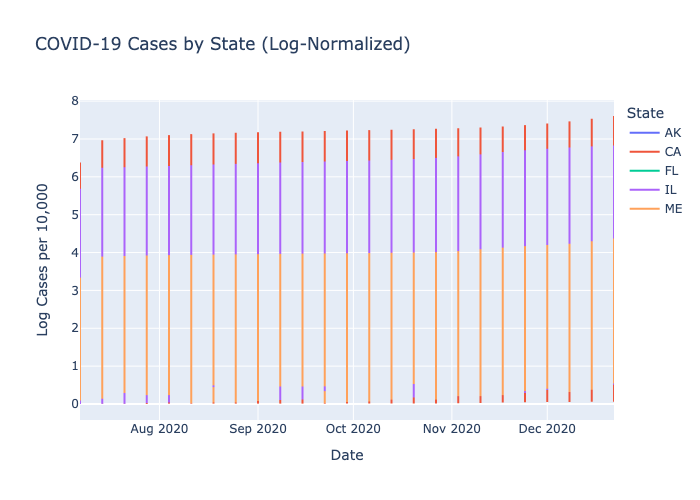

In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import os
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')  # Replace with your data file
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')  # Replace with your population data file
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

cases['Date'] = pd.to_datetime(cases['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = cases.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'cases': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State')

# Calculate normalization factors (per 10,000)
merged_data['Cases_Per_10K'] = (merged_data['cases'] / merged_data['population']) * 10000

# Calculate log-normalized values
merged_data['Log_Cases_Per_10K'] = np.log10(merged_data['Cases_Per_10K'] + 1)  # Add 1 to avoid log(0)

# Specify the 5 states you want to compare
selected_states = ['AK', 'CA', 'FL', 'IL', 'ME']

# Filter data for the selected states
selected_data = merged_data[merged_data['State'].isin(selected_states)]

# Exclude the latest date to avoid incomplete data
end_date_to_exclude = selected_data['Date'].max()
selected_data = selected_data[selected_data['Date'] < end_date_to_exclude]

# Create a line chart using Plotly Express for log-normalized values
fig_log_cases_per_10k = px.line(selected_data, x='Date', y='Log_Cases_Per_10K', color='State',
                             title='COVID-19 Cases by State (Log-Normalized)',
                             labels={'Log_Cases_Per_10K': 'Log Cases per 10,000'})

# Modify date labels to move one place forward (shifted)
fig_log_cases_per_10k.update_xaxes(dtick='M1', tickformat='%b %Y')
fig_log_cases_per_10k.update_xaxes(showgrid=True)
fig_log_cases_per_10k.update_yaxes(title_text='Log Cases per 10,000')

# Save the static image to a temporary file
temp_image_filename = 'temp_log_cases_per_10k.png'
pio.write_image(fig_log_cases_per_10k, temp_image_filename)

# Display the image in the notebook
display(Image(filename=temp_image_filename))

# Clean up the temporary file
os.remove(temp_image_filename)


## For Deaths

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



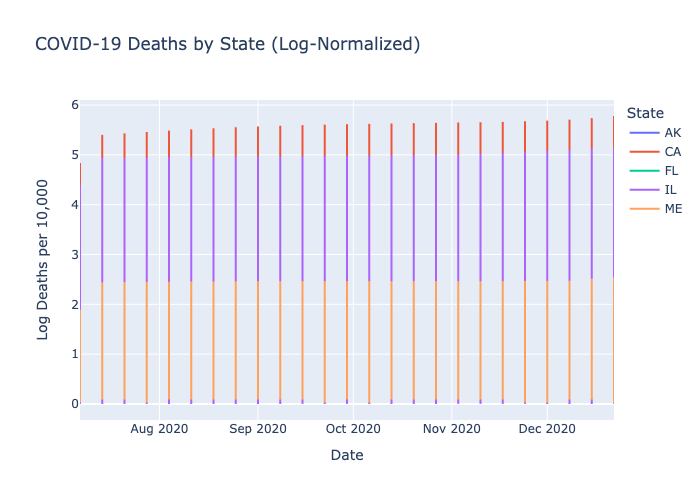

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import os
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')  # Replace with your population data file
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

deaths['Date'] = pd.to_datetime(deaths['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = deaths.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'deaths': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State')

# Calculate normalization factors (per 10,000)
merged_data['deaths_Per_10K'] = (merged_data['deaths'] / merged_data['population']) * 10000

# Calculate log-normalized values
merged_data['Log_deaths_Per_10K'] = np.log10(merged_data['deaths_Per_10K'] + 1)  # Add 1 to avoid log(0)

# Specify the 5 states you want to compare
selected_states = ['AK', 'CA', 'FL', 'IL', 'ME']

# Filter data for the selected states
selected_data = merged_data[merged_data['State'].isin(selected_states)]

# Exclude the latest date to avoid incomplete data
end_date_to_exclude = selected_data['Date'].max()
selected_data = selected_data[selected_data['Date'] < end_date_to_exclude]

# Create a line chart using Plotly Express for log-normalized values
fig_log_deaths_per_10k = px.line(selected_data, x='Date', y='Log_deaths_Per_10K', color='State',
                             title='COVID-19 Deaths by State (Log-Normalized)',
                             labels={'Log_deaths_Per_10K': 'Log Deaths per 10,000'})

# Modify date labels to move one place forward (shifted)
fig_log_deaths_per_10k.update_xaxes(dtick='M1', tickformat='%b %Y')
fig_log_deaths_per_10k.update_xaxes(showgrid=True)
fig_log_deaths_per_10k.update_yaxes(title_text='Log Deaths per 10,000')

# Save the static image to a temporary file
temp_image_filename = 'temp_log_deaths_per_10k.png'
pio.write_image(fig_log_deaths_per_10k, temp_image_filename)

# Display the image in the notebook
display(Image(filename=temp_image_filename))

# Clean up the temporary file
os.remove(temp_image_filename)


# Peak Week Calculation

In [90]:
 import pandas as pd

# Load your COVID-19 data into a DataFrame
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')

# Define the selected states for comparison
selected_states = ['AK', 'CA', 'FL', 'IL', 'ME']
cases['Date'] = pd.to_datetime(cases['Date'])
# Initialize a list to store peak data
 data= []

# Iterate through the selected states
for state in selected_states:
    # Filter data for the current state
    state_data = cases[cases['State'] == state]
    
    # Group data by week (Monday-based) and calculate the sum of cases
    peak_week = state_data.groupby(pd.Grouper(key='Date', freq='W-MON')).agg({
        'cases': 'sum'
    }).reset_index()
     

    # Find the row with the maximum cases (peak week)
    cases_week = peak_week.loc[peak_week['cases'].idxmax()]

    # Append peak data to the list
    data.append({
        'State': state,
        'HighestCases Week': cases_week['Date'],
        'HighestCases  ': cases_week['cases'],
    })

# Create a DataFrame from the peak data
 df = pd.DataFrame(data)

# Print the DataFrame
 df


,State,HighestCases Week,HighestCases
0,AK,2020-12-21,297736
1,CA,2020-12-21,13758836
2,FL,2020-12-21,8256407
3,IL,2020-12-21,6200116
4,ME,2020-12-21,127278


In [179]:
import pandas as pd

# Load your COVID-19 data into a DataFrame
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')

# Convert the 'Date' column to a datetime type
cases['Date'] = pd.to_datetime(cases['Date'])

# Group data by state and week (Monday-based) and calculate the sum of cases
peak_weeks = cases.groupby(['State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'cases': 'sum'
}).reset_index()

# Find the rows with the maximum cases (peak weeks) for each state
peak_cases = peak_weeks.loc[peak_weeks.groupby('State')['cases'].idxmax()]

# Print the DataFrame with peak values for all states
peak_cases 


,State,Date,cases
24,AK,2020-12-21,297736
50,AL,2020-12-21,2200378
76,AR,2020-12-21,1377533
102,AZ,2020-12-21,3086733
128,CA,2020-12-21,13758836
154,CO,2020-12-21,2121095
180,CT,2020-12-21,1129068
206,DC,2020-12-21,182558
232,DE,2020-12-21,344744
258,FL,2020-12-21,8256407


### From the above two output we can say that the states follow the US pattern because the peak weeks in the US are in December 

# Deaths peak Weeks in 5 States

In [89]:
 import pandas as pd

# Load your COVID-19 data into a DataFrame
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')

# Define the selected states for comparison
selected_states = ['AK', 'CA', 'FL', 'IL', 'ME']
 deaths['Date'] = pd.to_datetime(deaths['Date'])
# Initialize a list to store peak data
 data= []

# Iterate through the selected states
for state in selected_states:
    # Filter data for the current state
    state_data = deaths[deaths['State'] == state]
    
    # Group data by week (Monday-based) and calculate the sum of cases
    peak_week = state_data.groupby(pd.Grouper(key='Date', freq='W-MON')).agg({
        'deaths': 'sum'
    }).reset_index()
     

    # Find the row with the maximum cases (peak week)
    cases_week = peak_week.loc[peak_week['deaths'].idxmax()]

    # Append peak data to the list
    data.append({
        'State': state,
        'HighestDeaths Week': cases_week['Date'],
        'HighestDeaths  ': cases_week['deaths'],
    })

    df = pd.DataFrame(data)

# Print the DataFrame
 df


,State,HighestDeaths Week,HighestDeaths
0,AK,2020-12-21,1493
1,CA,2020-12-21,179189
2,FL,2020-12-21,142677
3,IL,2020-12-21,112811
4,ME,2020-12-21,1966


In [177]:
import pandas as pd

# Load your COVID-19 data into a DataFrame
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')

# Convert the 'Date' column to a datetime type
deaths['Date'] = pd.to_datetime(deaths['Date'])

# Group data by state and week (Monday-based) and calculate the sum of cases
peak_weeks = deaths.groupby(['State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum'
}).reset_index()

# Find the rows with the maximum cases (peak weeks) for each state
peak_cases = peak_weeks.loc[peak_weeks.groupby('State')['deaths'].idxmax()]

# Print the DataFrame with peak values for all states
peak_cases


,State,Date,deaths
24,AK,2020-12-21,1493
50,AL,2020-12-21,30037
76,AR,2020-12-21,22063
102,AZ,2020-12-21,54327
128,CA,2020-12-21,179189
154,CO,2020-12-21,29686
180,CT,2020-12-21,38943
206,DC,2020-12-21,5102
232,DE,2020-12-21,5947
258,FL,2020-12-21,142677


### From the above two output we can say that the states follow the US pattern because the peak weeks in the US are in December 

## Describe why the rates differ across these states in the notebook

## From the five states which i have choosen the cases are most in CA
#### Dr. Robert Kim-Farley, a medical epidemiologist and infectious disease expert at the UCLA Fielding School of Public Health, said a person who was exposed to the virus at a Christmas gathering could be infectious by New Year’s Eve. But that individual may be asymptomatic, go to a New Year’s Eve party and unknowingly spread the disease.
#### All the five states have peak cases and deaths in the last week of december because of new year celebrations and christmas celebrations
#### Climate Condition also played a important role in this peak week because this was the first winter after covid-19.So, it got transfered easily to other people.
#### And vaccine got released into the market in the first half of 2021.It also played a crucial role in increase of cases

## Identify five counties within a state of your choice with high cases and death rates.

## Cases

In [213]:
# Replace 'Your_Target_State' with the state you want to analyze (e.g., 'California' in this example)
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')  
    
merged_data_cases = cases.groupby(['County Name', 'State'])['cases'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_cases[merged_data_cases['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['cases'], ascending=False)

# Select the top five counties with the highest case counts
top_counties = sorted_data.head(5)

# Reset the index to start from 1
top_counties.index = range(1, len(top_counties) + 1)

# Print the top 5 counties for the chosen state
print(f"Top 5 Counties in {target_state} with High Cases:")
top_counties[['County Name', 'cases']]
 

Top 5 Counties in IL with High Cases:


,County Name,cases
1,Cook County,32370775
2,DuPage County,4343150
3,Lake County,3847241
4,Will County,3562427
5,Kane County,3145949


## Deaths

In [81]:
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')
 
    
merged_data_deaths = deaths.groupby(['County Name', 'State'])['deaths'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['deaths'], ascending=False)

# Select the top five counties with the highest case counts
top_counties = sorted_data.head(5)

# Reset the index to start from 1
top_counties.index = range(1, len(top_counties) + 1)

# Print the top 5 counties for the chosen state
print(f"Top 5 Counties in {target_state} with High deaths:")
top_counties[['County Name', 'deaths']]


Top 5 Counties in IL with High deaths:


,County Name,deaths
1,Cook County,979460
2,DuPage County,109586
3,Lake County,91988
4,Will County,76593
5,Kane County,63919


## Death Rate

In [216]:
 
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')  

# Load your COVID-19 death data into a DataFrame
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')

merged_data_cases = cases.groupby(['County Name', 'State'])['cases'].sum().reset_index()
# Remove duplicates if they exist

target_state = 'IL'  # Replace with your target state

# Filter data for the chosen state
state_data = merged_data_cases[merged_data_cases['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['cases'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_cases = sorted_data.head(5)

# Reset the index to start from 1
top_counties_cases.index = range(1, len(top_counties) + 1)

 

deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')
 
    
merged_data_deaths = deaths.groupby(['County Name', 'State'])['deaths'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['deaths'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_deaths = sorted_data.head(5)

# Reset the index to start from 1
top_counties_deaths.index = range(1, len(top_counties) + 1)

 
# Combine top_counties_cases and top_counties_deaths DataFrames
combined_data = pd.concat([top_counties_cases, top_counties_deaths], axis=1)

# Calculate death rate (assuming 'deaths' represents the number of deaths)
combined_data['Death Rate'] = (top_counties_deaths['deaths'] / top_counties_cases['cases']) * 100


combined_data


,County Name,State,cases,County Name,State,deaths,Death Rate
1,Cook County,IL,32370775,Cook County,IL,979460,3.025754
2,DuPage County,IL,4343150,DuPage County,IL,109586,2.523192
3,Lake County,IL,3847241,Lake County,IL,91988,2.391012
4,Will County,IL,3562427,Will County,IL,76593,2.150023
5,Kane County,IL,3145949,Kane County,IL,63919,2.031788


# Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.
# 1) cases and top 5 infected counties in the US 

Top 5 Counties in US with High cases:
           County Name     cases State
1  Los Angeles County   54810711    CA
2         Cook County   32370775    IL
3   Miami-Dade County   30204525    FL
4     Maricopa County   27425638    AZ
5       Harris County   23490247    TX


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1150859687.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



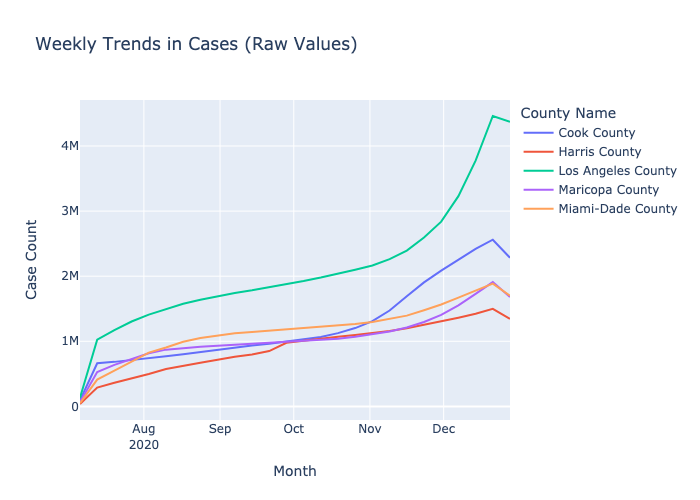

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1150859687.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



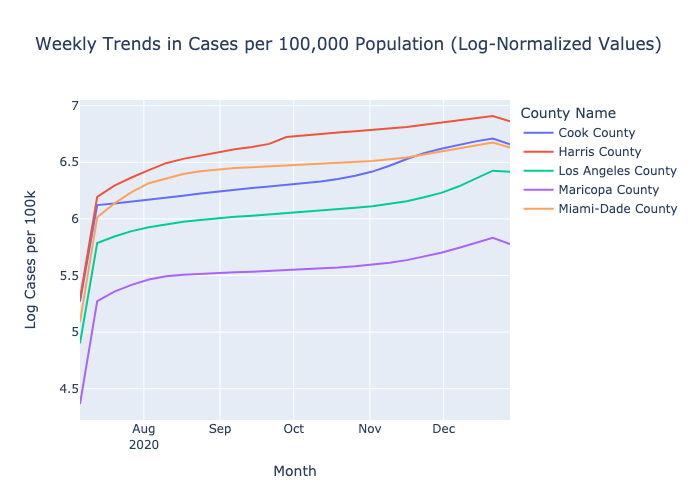

In [95]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

# Load your COVID-19 data into a DataFrame (replace with your data file)
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')

# Identify the top 5 infected counties based on cases
merged_data_cases = cases.groupby(['County Name', 'State'])['cases'].sum().reset_index()
# Remove duplicates if they exist
state_data = merged_data_cases.drop_duplicates(subset=['County Name', 'State'])

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['cases'], ascending=False)

# Select the top five counties with the highest case counts
top_counties = sorted_data.head(5)
top_counties.index = range(1, len(top_counties) + 1)
print("Top 5 Counties in US with High cases:")
print(top_counties[['County Name', 'cases', 'State']])

# Extract COVID-19 data for the top 5 counties
top_county_data = cases[cases.set_index(['County Name', 'State']).index.isin(top_counties.set_index(['County Name', 'State']).index)]
top_county_data['Date'] = pd.to_datetime(top_county_data['Date'])

# Group by week and calculate the sum of cases
weekly_data = top_county_data.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'cases': 'sum'
}).reset_index()

# Create an interactive plot for weekly trends in cases
fig = px.line(weekly_data, x='Date', y='cases', color='County Name',
              title='Weekly Trends in Cases (Raw Values)',
              labels={'cases': 'Case Count', 'Date': 'Month'})

fig.update_xaxes(dtick='M1', tickformat='%b\n%Y')  # Display months on the x-axis

# Save the static image to a file
pio.write_image(fig, 'weekly_trends_cases.png', format='png')

# Display the static image in the notebook
from IPython.display import Image, display
display(Image(filename='weekly_trends_cases.png'))

# Load population data
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)
cases['Date'] = pd.to_datetime(cases['Date'])
# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly_cases = cases.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'cases': 'sum',  # Sum of cases for the week
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly_cases, population, on='State')

# Extract COVID-19 data for the top 5 counties
top_county_data = merged_data[merged_data.set_index(['County Name', 'State']).index.isin(top_counties.set_index(['County Name', 'State']).index)]
top_county_data['Date'] = pd.to_datetime(top_county_data['Date'])

# Group by week and calculate the sum of cases
weekly_data = top_county_data.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'cases': 'sum','population': 'max'
}).reset_index()

# Create a new column for cases per 100,000 population
weekly_data['cases_per_100k'] = (weekly_data['cases'] / weekly_data['population']) * 100000

# Apply a logarithmic transformation to cases_per_100k
weekly_data['log_cases_per_100k'] = np.log10(weekly_data['cases_per_100k'] + 1)  # Add 1 to avoid log(0)

# Create a Plotly figure with a logarithmic y-axis
fig = px.line(weekly_data, x='Date', y='log_cases_per_100k', color='County Name',
              title='Weekly Trends in Cases per 100,000 Population (Log-Normalized Values)',
              labels={'log_cases_per_100k': 'Log Cases per 100k', 'Date': 'Month'})

fig.update_xaxes(dtick='M1', tickformat='%b\n%Y')  # Display months on the x-axis

# Save the static image to a file
pio.write_image(fig, 'weekly_trends_cases_per_100k.png', format='png')

# Display the static image in the notebook
display(Image(filename='weekly_trends_cases_per_100k.png'))


## 2) For Deaths

Top 5 Counties in US with High deaths:
           County Name   deaths State
1        Kings County   1288065    NY
2       Queens County   1271532    NY
3  Los Angeles County   1168110    CA
4         Cook County    979460    IL
5        Bronx County    865580    NY


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1927276477.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1927276477.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



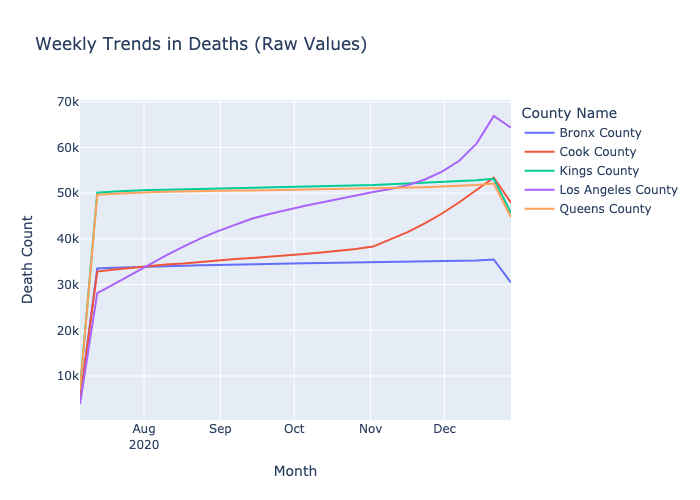

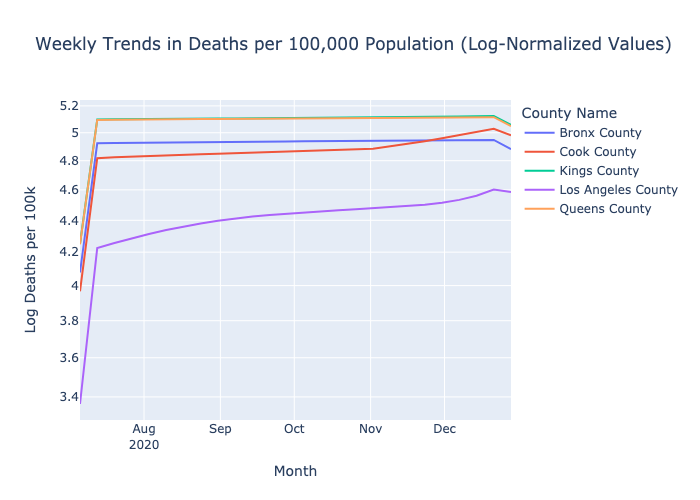

In [96]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

# Load your COVID-19 data into a DataFrame (replace with your data file)
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')

# Identify the top 5 infected counties based on deaths
merged_data_deaths = deaths.groupby(['County Name', 'State'])['deaths'].sum().reset_index()
# Remove duplicates if they exist
state_data = merged_data_deaths.drop_duplicates(subset=['County Name', 'State'])

# Sort counties by total death counts in descending order
sorted_data = state_data.sort_values(by=['deaths'], ascending=False)

# Select the top five counties with the highest death counts
top_counties = sorted_data.head(5)
top_counties.index = range(1, len(top_counties) + 1)
print("Top 5 Counties in US with High deaths:")
print(top_counties[['County Name', 'deaths','State']])

# Extract COVID-19 data for the top 5 counties
top_county_data = deaths[deaths.set_index(['County Name', 'State']).index.isin(top_counties.set_index(['County Name', 'State']).index)]
top_county_data['Date'] = pd.to_datetime(top_county_data['Date'])

# Group by week and calculate the sum of deaths
weekly_data = top_county_data.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum'
}).reset_index()

# Create an interactive plot for weekly trends in deaths
fig = px.line(weekly_data, x='Date', y='deaths', color='County Name', title='Weekly Trends in Deaths (Raw Values)',
              labels={'deaths': 'Death Count', 'Date': 'Month'})
fig.update_xaxes(dtick='M1', tickformat='%b\n%Y')  # Display months on the x-axis

# Save the static image to a file
pio.write_image(fig, 'weekly_trends_deaths.png', format='png')

# Load population data (replace with your population data file)
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

deaths['Date'] = pd.to_datetime(deaths['Date'])
# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly_deaths = deaths.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum',  # Sum of deaths for the week
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly_deaths, population, on='State')

# Extract COVID-19 data for the top 5 counties
top_county_data = merged_data[merged_data.set_index(['County Name', 'State']).index.isin(top_counties.set_index(['County Name', 'State']).index)]
top_county_data['Date'] = pd.to_datetime(top_county_data['Date'])

# Group by week and calculate the sum of deaths
weekly_data = top_county_data.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum',
    'population': 'max'  # Get the population for each county (assuming it's constant for the week)
}).reset_index()

# Calculate deaths per 100,000 population
weekly_data['deaths_per_100k'] = (weekly_data['deaths'] / weekly_data['population']) * 100000

# Apply a logarithmic transformation to deaths_per_100k
weekly_data['log_deaths_per_100k'] = np.log10(weekly_data['deaths_per_100k'] + 1)  # Add 1 to avoid log(0)

# Create a Plotly figure with a logarithmic y-axis
fig = px.line(weekly_data, x='Date', y='log_deaths_per_100k', color='County Name',
              title='Weekly Trends in Deaths per 100,000 Population (Log-Normalized Values)',
              labels={'log_deaths_per_100k': 'Log Deaths per 100k', 'Date': 'Month'})

fig.update_xaxes(dtick='M1', tickformat='%b\n%Y')  # Display months on the x-axis
fig.update_yaxes(type='log')  # Apply a logarithmic transformation to the y-axis

# Save the static image to a file
pio.write_image(fig, 'weekly_trends_deaths_per_100k.png', format='png')

# Display the static image in the notebook
from IPython.display import Image, display
display(Image(filename='weekly_trends_deaths.png'))
display(Image(filename='weekly_trends_deaths_per_100k.png'))


## Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern. 
## 1) top 5 counties from any one choosen state continuation of 3 question

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/955531182.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/955531182.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



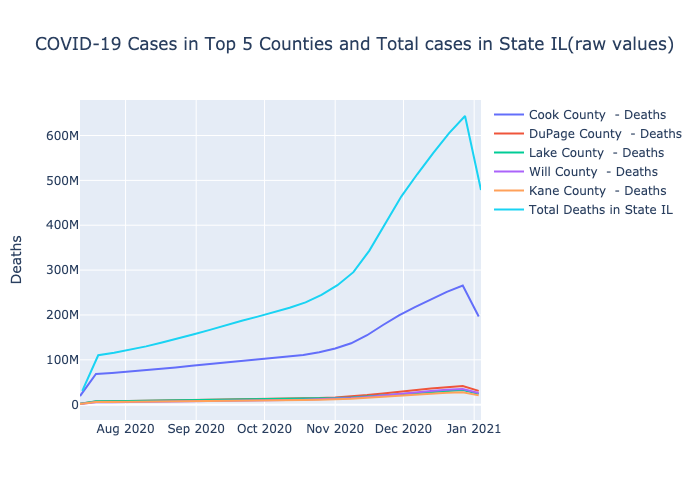

In [171]:
 import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame (replace with your data file)
ases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

cases['Date'] = pd.to_datetime(cases['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = cases.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'cases': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State') 
    
merged_data_deaths = cases.groupby(['County Name', 'State'])['cases'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['cases'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_deaths = sorted_data.head(5) 
 
# Extract COVID-19 data for the top 5 counties
top_county_data_deaths = merged_data[merged_data .set_index(['County Name', 'State']).index.isin(top_counties_deaths.set_index(['County Name', 'State']).index)]
top_county_data_deaths['Date'] = pd.to_datetime(top_county_data_deaths['Date'])

# Group by week and calculate the sum of deaths for the top 5 counties
weekly_data_deaths = top_county_data_deaths.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W')]).agg({
    'cases': 'sum','population':'max'
}).reset_index()
 
# Specify the top 5 county names
top_county_names = top_counties_deaths['County Name'].tolist()
 

# Create a Plotly figure for cases
fig_cases = go.Figure()

# Add traces for top 5 county cases
for county_name in top_county_names:
    county_data =weekly_data_deaths[weekly_data_deaths['County Name'] == county_name]
    fig_cases.add_trace(go.Scatter(x=county_data['Date'], y=county_data['cases'], name=f'{county_name} - Deaths'))

# Add trace for total state cases
state_data_deaths = merged_data[merged_data['State'] == target_state]
state_data_deaths['Date'] = pd.to_datetime(state_data_deaths['Date'])
state_total_deaths = state_data_deaths.groupby(pd.Grouper(key='Date', freq='W-MON'))['cases'].sum().reset_index()
fig_cases.add_trace(go.Scatter(x=state_total_deaths['Date'], y= (state_total_deaths['cases']), name=f'Total Deaths in State {target_state}'))

# Modify date labels to move one place forward (shifted)
fig_cases.update_xaxes(dtick='M1', tickformat='%b %Y')

# Set the y-axis title
fig_cases.update_yaxes(title_text='Deaths')

# Set the title for the entire figure
fig_cases.update_layout(title=f'COVID-19 Cases in Top 5 Counties and Total cases in State {target_state}(raw values)')

# Save the static image to a file
fig_cases_file_path = f'weekly_trends_deaths_{target_state}.png'
pio.write_image(fig_cases, fig_cases_file_path, format='png')

# Display the cases figure
display(Image(filename=fig_cases_file_path))


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1219800313.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1219800313.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



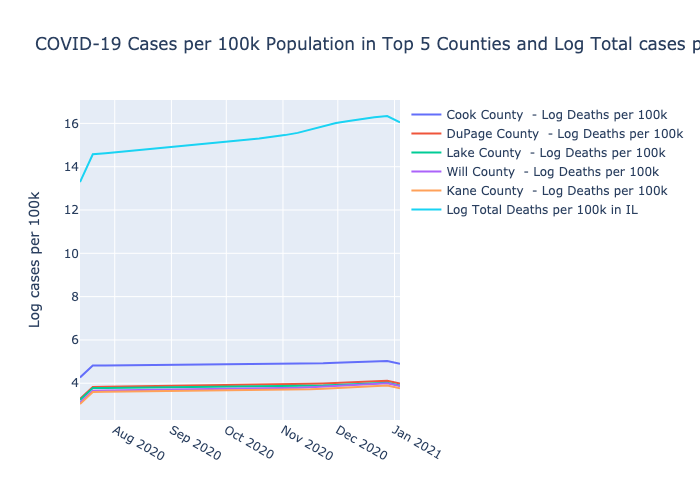

In [173]:
 import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame (replace with your data file)
cases = pd.read_csv('/Users/naramsupriya/weeklyCases_changed.csv')
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

cases['Date'] = pd.to_datetime(cases['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = cases.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'cases': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State') 
    
merged_data_deaths = cases.groupby(['County Name', 'State'])['cases'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['cases'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_deaths = sorted_data.head(5) 
 
# Extract COVID-19 data for the top 5 counties
top_county_data_deaths = merged_data[merged_data .set_index(['County Name', 'State']).index.isin(top_counties_deaths.set_index(['County Name', 'State']).index)]
top_county_data_deaths['Date'] = pd.to_datetime(top_county_data_deaths['Date'])

# Group by week and calculate the sum of deaths for the top 5 counties
weekly_data_deaths = top_county_data_deaths.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'cases': 'sum','population':'max'
}).reset_index()
 
# Specify the top 5 county names
top_county_names = top_counties_deaths['County Name'].tolist()
 
# Create a Plotly figure for deaths per 100,000 population
fig_deaths_per_100k = go.Figure()

# Calculate deaths per 100,000 population
weekly_data_deaths['deaths_per_100k'] = (weekly_data_deaths['cases'] / weekly_data_deaths['population']) * 100000
weekly_data_deaths['log_deaths_per_100k'] = np.log10(weekly_data['deaths_per_100k'] + 1)  # Add 1 to avoid log(0)

# Add traces for top 5 county deaths per 100,000 population
for county_name in top_county_names:
    county_data = weekly_data_deaths[weekly_data_deaths['County Name'] == county_name]
    fig_deaths_per_100k.add_trace(go.Scatter(x=county_data['Date'], y=county_data['log_deaths_per_100k'], name=f'{county_name} - Log Deaths per 100k'))

# Add trace for total state deaths per 100,000 population
state_data_deaths = merged_data[merged_data['State'] == target_state]
state_data_deaths['Date'] = pd.to_datetime(state_data_deaths['Date'])
state_total_deaths_per_100k = state_data_deaths.groupby(pd.Grouper(key='Date', freq='W-MON')).agg({'cases': 'sum','population':'max'}).reset_index()
 
state_total_deaths_per_100k['deaths_per_100k'] = (state_total_deaths_per_100k['cases'] / state_total_deaths_per_100k['population']) * 100000
fig_deaths_per_100k.add_trace(go.Scatter(x=state_total_deaths_per_100k['Date'], y=np.log(state_total_deaths_per_100k['deaths_per_100k'] + 1), name=f'Log Total Deaths per 100k in {target_state}'))

# Modify date labels to move one place forward (shifted)
fig_deaths_per_100k.update_xaxes(dtick='M1', tickformat='%b %Y')

# Set the y-axis title
fig_deaths_per_100k.update_yaxes(title_text='Log cases per 100k')

# Set the title for the entire figure
fig_deaths_per_100k.update_layout(title=f'COVID-19 Cases per 100k Population in Top 5 Counties and Log Total cases per 100k in {target_state}')

# Save the static image to a file
fig_deaths_per_100k_file_path = f'weekly_trends_deaths_per_100k_{target_state}.png'
pio.write_image(fig_deaths_per_100k, fig_deaths_per_100k_file_path, format='png')

# Display the deaths per 100,000 population figure
display(Image(filename=fig_deaths_per_100k_file_path))


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1624745767.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/1624745767.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



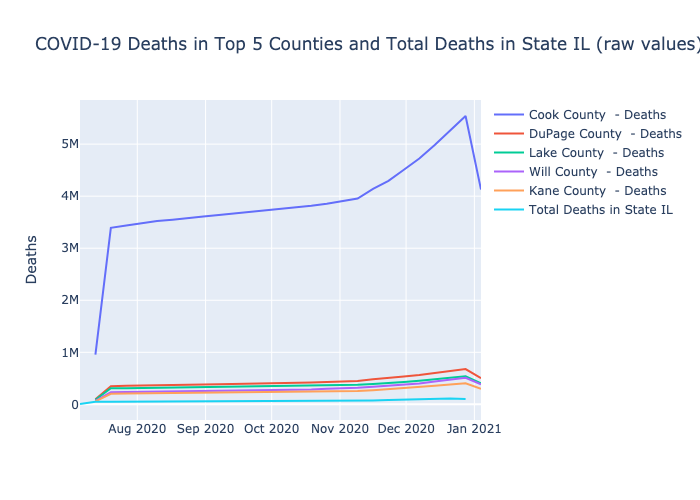

In [175]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image, display

# Load your COVID-19 data into a DataFrame (replace with your data file)
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

deaths['Date'] = pd.to_datetime(deaths['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = deaths.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'deaths': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State') 
    
merged_data_deaths = deaths.groupby(['County Name', 'State'])['deaths'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['deaths'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_deaths = sorted_data.head(5) 
 
# Extract COVID-19 data for the top 5 counties
top_county_data_deaths = merged_data[merged_data .set_index(['County Name', 'State']).index.isin(top_counties_deaths.set_index(['County Name', 'State']).index)]
top_county_data_deaths['Date'] = pd.to_datetime(top_county_data_deaths['Date'])

# Group by week and calculate the sum of deaths for the top 5 counties
weekly_data_deaths = top_county_data_deaths.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum','population':'max'
}).reset_index()
 
# Specify the top 5 county names
top_county_names = top_counties_deaths['County Name'].tolist()

# Create a Plotly figure for cases
fig_cases = go.Figure()

# Add traces for top 5 county cases
for county_name in top_county_names:
    county_data =weekly_data_deaths[weekly_data_deaths['County Name'] == county_name]
    fig_cases.add_trace(go.Scatter(x=county_data['Date'], y=county_data['deaths'], name=f'{county_name} - Deaths'))

# Add trace for total state cases
state_data_deaths = deaths[deaths['State'] == target_state]
state_data_deaths['Date'] = pd.to_datetime(state_data_deaths['Date'])
state_total_deaths = state_data_deaths.groupby(pd.Grouper(key='Date', freq='W-MON'))['deaths'].sum().reset_index()
fig_cases.add_trace(go.Scatter(x=state_total_deaths['Date'], y= (state_total_deaths['deaths']), name=f'Total Deaths in State {target_state}'))

# Modify date labels to move one place forward (shifted)
fig_cases.update_xaxes(dtick='M1', tickformat='%b %Y')

# Set the y-axis title
fig_cases.update_yaxes(title_text='Deaths')

# Set the title for the entire figure
fig_cases.update_layout(title=f'COVID-19 Deaths in Top 5 Counties and Total Deaths in State {target_state} (raw values)')

# Save the static image to a file
fig_cases_file_path = f'weekly_trends_deaths_{target_state}.png'
pio.write_image(fig_cases, fig_cases_file_path, format='png')

# Display the cases figure
display(Image(filename=fig_cases_file_path))


/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/2294289502.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pk/3sf6k0dx14lbd9smnrq69x7h0000gn/T/ipykernel_4097/2294289502.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



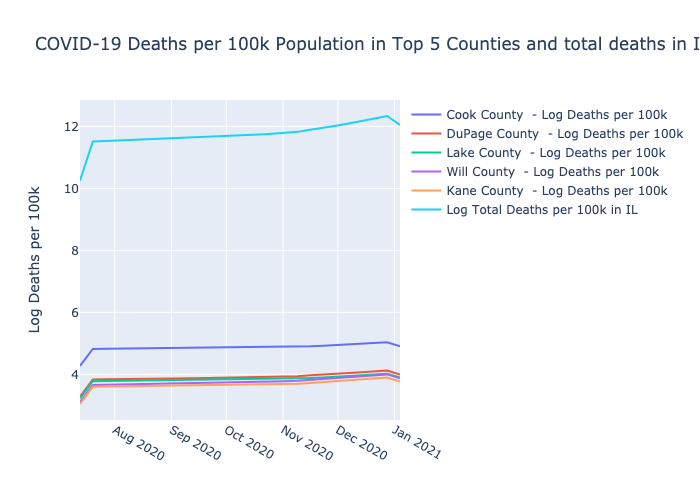

In [172]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image, display

# Load our COVID-19 data into a DataFrame
deaths = pd.read_csv('/Users/naramsupriya/weeklydeaths_changed.csv')
population_unchanged = pd.read_csv('/Users/naramsupriya/Documents/ DataScienceProject/county.csv')
population = population_unchanged.drop(['County Name', 'countyFIPS'], axis=1)

deaths['Date'] = pd.to_datetime(deaths['Date'])

# Group by 'countyFIPS', 'County Name', 'State', 'StateFIPS', and the weekly frequency of 'Date'
weekly = deaths.groupby(['countyFIPS', 'County Name', 'State', 'StateFIPS', pd.Grouper(key='Date', freq='W-TUE')]).agg({
    'deaths': 'sum',
}).reset_index()

# Merge COVID-19 data with population data based on the common key (e.g., 'State')
merged_data = pd.merge(weekly, population, on='State') 
    
merged_data_deaths = deaths.groupby(['County Name', 'State'])['deaths'].sum().reset_index()
# Remove duplicates if they exist
 

target_state = 'IL'

# Filter data for the chosen state
state_data = merged_data_deaths[merged_data_deaths['State'] == target_state]

# Sort counties by total case counts in descending order
sorted_data = state_data.sort_values(by=['deaths'], ascending=False)

# Select the top five counties with the highest case counts
top_counties_deaths = sorted_data.head(5) 
 
# Extract COVID-19 data for the top 5 counties
top_county_data_deaths = merged_data[merged_data .set_index(['County Name', 'State']).index.isin(top_counties_deaths.set_index(['County Name', 'State']).index)]
top_county_data_deaths['Date'] = pd.to_datetime(top_county_data_deaths['Date'])

# Group by week and calculate the sum of deaths for the top 5 counties
weekly_data_deaths = top_county_data_deaths.groupby(['County Name', 'State', pd.Grouper(key='Date', freq='W-MON')]).agg({
    'deaths': 'sum','population':'max'
}).reset_index()
 
# Specify the top 5 county names
top_county_names = top_counties_deaths['County Name'].tolist()
 
# Create a Plotly figure for deaths per 100,000 population
fig_deaths_per_100k = go.Figure()

# Calculate deaths per 100,000 population
weekly_data_deaths['deaths_per_100k'] = (weekly_data_deaths['deaths'] / weekly_data_deaths['population']) * 100000
weekly_data_deaths['log_deaths_per_100k'] = np.log10(weekly_data['deaths_per_100k'] + 1)  # Add 1 to avoid log(0)

# Add traces for top 5 county deaths per 100,000 population
for county_name in top_county_names:
    county_data = weekly_data_deaths[weekly_data_deaths['County Name'] == county_name]
    fig_deaths_per_100k.add_trace(go.Scatter(x=county_data['Date'], y=county_data['log_deaths_per_100k'], name=f'{county_name} - Log Deaths per 100k'))

# Add trace for total state deaths per 100,000 population
state_data_deaths = merged_data[merged_data['State'] == target_state]
state_data_deaths['Date'] = pd.to_datetime(state_data_deaths['Date'])
state_total_deaths_per_100k = state_data_deaths.groupby(pd.Grouper(key='Date', freq='W-MON')).agg({'deaths': 'sum','population':'max'}).reset_index()
 
state_total_deaths_per_100k['deaths_per_100k'] = (state_total_deaths_per_100k['deaths'] / state_total_deaths_per_100k['population']) * 100000
fig_deaths_per_100k.add_trace(go.Scatter(x=state_total_deaths_per_100k['Date'], y=np.log(state_total_deaths_per_100k['deaths_per_100k'] + 1), name=f'Log Total Deaths per 100k in {target_state}'))

# Modify date labels to move one place forward (shifted)
fig_deaths_per_100k.update_xaxes(dtick='M1', tickformat='%b %Y')

# Set the y-axis title
fig_deaths_per_100k.update_yaxes(title_text='Log Deaths per 100k')

# Set the title for the entire figure
fig_deaths_per_100k.update_layout(title=f'COVID-19 Deaths per 100k Population in Top 5 Counties and total deaths in {target_state}')

# Save the static image to a file
fig_deaths_per_100k_file_path = f'weekly_trends_deaths_per_100k_{target_state}.png'
pio.write_image(fig_deaths_per_100k, fig_deaths_per_100k_file_path, format='png')

# Display the deaths per 100,000 population figure
display(Image(filename=fig_deaths_per_100k_file_path))


# From the above 4 graphs we can say that the counties follow  state pattern